In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import opendatasets as od
import pandas as pd
import random
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot  as plt

In [ ]:
od.download("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
kdata = pd.read_csv("./creditcardfraud/creditcard.csv")
kdata

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prathameshpravin
Your Kaggle Key: ··········


100%|██████████| 66.0M/66.0M [00:00<00:00, 207MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data = np.array(kdata)
rng = np.random.default_rng(1)
rng.shuffle(data)

features,classi = np.split(data,[30],axis=1)

normalize = layers.Normalization(axis=-1)
normalize.adapt(features)
normalized = normalize(features)

data = np.column_stack([normalized,classi])

train,test = np.split(data,[int(np.shape(data)[0]*0.9)])

timed,iTrain28,amountd,oTrain2 = np.split(train,[1,29,30],axis=1)
oTrain2 = np.column_stack([oTrain2,1-oTrain2])

In [ ]:
encoding_dim = 56

aeInput = keras.Input(shape=(28,))
aeHiddenLayer = layers.Dense(encoding_dim, activation='sigmoid')(aeInput)
aeOutput = layers.Dense(28, activation='sigmoid')(aeHiddenLayer)

autoencoder = keras.Model(aeInput, aeOutput)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

In [ ]:
aeHistory = autoencoder.fit(iTrain28, iTrain28,
                validation_split=0.1,
                epochs=10,
                verbose=2,
                shuffle=True)

Epoch 1/10
7210/7210 - 12s - loss: 0.7419 - val_loss: 0.6374 - 12s/epoch - 2ms/step
Epoch 2/10
7210/7210 - 14s - loss: 0.6862 - val_loss: 0.6296 - 14s/epoch - 2ms/step
Epoch 3/10
7210/7210 - 19s - loss: 0.6811 - val_loss: 0.6266 - 19s/epoch - 3ms/step
Epoch 4/10
7210/7210 - 11s - loss: 0.6789 - val_loss: 0.6252 - 11s/epoch - 2ms/step
Epoch 5/10
7210/7210 - 11s - loss: 0.6777 - val_loss: 0.6242 - 11s/epoch - 2ms/step
Epoch 6/10
7210/7210 - 11s - loss: 0.6770 - val_loss: 0.6236 - 11s/epoch - 1ms/step
Epoch 7/10
7210/7210 - 11s - loss: 0.6765 - val_loss: 0.6232 - 11s/epoch - 2ms/step
Epoch 8/10
7210/7210 - 11s - loss: 0.6761 - val_loss: 0.6229 - 11s/epoch - 2ms/step
Epoch 9/10
7210/7210 - 11s - loss: 0.6758 - val_loss: 0.6227 - 11s/epoch - 1ms/step
Epoch 10/10
7210/7210 - 13s - loss: 0.6756 - val_loss: 0.6225 - 13s/epoch - 2ms/step


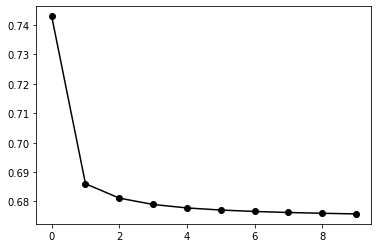

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(aeHistory.history.values())[0],'k-o')

In [ ]:
medHiddenDim = 25
medHiddenLayer = layers.Dense(medHiddenDim, activation='sigmoid')(aeHiddenLayer)
medOutput = layers.Dense(2, activation='sigmoid')(medHiddenLayer)

aeMed = keras.Model(aeInput, medOutput)
aeMed.compile(optimizer='adam', loss='MeanSquaredError')

In [ ]:
aeMedHistory = aeMed.fit(iTrain28, oTrain2,
                validation_split=0.1,
                epochs=10,
                verbose=2,
                shuffle=True)

Epoch 1/10
7210/7210 - 12s - loss: 0.0023 - val_loss: 4.4296e-04 - 12s/epoch - 2ms/step
Epoch 2/10
7210/7210 - 12s - loss: 5.6134e-04 - val_loss: 3.8739e-04 - 12s/epoch - 2ms/step
Epoch 3/10
7210/7210 - 11s - loss: 5.2852e-04 - val_loss: 3.7057e-04 - 11s/epoch - 2ms/step
Epoch 4/10
7210/7210 - 12s - loss: 4.9842e-04 - val_loss: 3.6559e-04 - 12s/epoch - 2ms/step
Epoch 5/10
7210/7210 - 11s - loss: 4.7803e-04 - val_loss: 3.3079e-04 - 11s/epoch - 2ms/step
Epoch 6/10
7210/7210 - 11s - loss: 4.6513e-04 - val_loss: 3.2366e-04 - 11s/epoch - 2ms/step
Epoch 7/10
7210/7210 - 11s - loss: 4.5372e-04 - val_loss: 3.2206e-04 - 11s/epoch - 2ms/step
Epoch 8/10
7210/7210 - 12s - loss: 4.4350e-04 - val_loss: 3.0411e-04 - 12s/epoch - 2ms/step
Epoch 9/10
7210/7210 - 11s - loss: 4.3202e-04 - val_loss: 3.2306e-04 - 11s/epoch - 2ms/step
Epoch 10/10
7210/7210 - 11s - loss: 4.2166e-04 - val_loss: 3.0871e-04 - 11s/epoch - 2ms/step


In [ ]:
np.where(oTrain2[:,0] == 1)[0]

array([   820,    821,   1008,   1590,   1758,   1996,   3156,   3218,
         3359,   3843,   4197,   4491,   6433,   6826,   7258,   8123,
         9267,   9524,   9674,   9971,  10966,  11070,  11172,  11932,
        11944,  12558,  12637,  13080,  14018,  14338,  14359,  14589,
        14614,  14667,  16205,  16696,  16757,  16862,  17242,  17486,
        17534,  17536,  17641,  17919,  18664,  18899,  19242,  20550,
        22068,  22733,  23173,  23832,  24647,  25201,  25222,  25294,
        26294,  27044,  27686,  28458,  28900,  29457,  30617,  30667,
        30671,  31309,  31564,  31572,  31757,  32314,  32570,  32922,
        35051,  36195,  36206,  36277,  36343,  38539,  39268,  39317,
        41165,  42334,  42442,  43007,  43371,  43555,  44845,  45500,
        45777,  46508,  48239,  48671,  49315,  50632,  52404,  52601,
        52955,  53347,  53525,  53901,  55370,  56252,  56516,  56532,
        56886,  57784,  57819,  58101,  58235,  58922,  59061,  59248,
      

In [ ]:
np.shape(np.where(oTrain2[:,0] == 1)[0])

(434,)

In [ ]:
def Qmod():
    Qmodel = keras.Sequential()
    Qmodel.add(layers.Dense(25, activation="sigmoid", kernel_initializer='zeros'))
    Qmodel.add(layers.Dense(15, activation="sigmoid", kernel_initializer='zeros'))
    Qmodel.add(layers.Dense(2, activation="sigmoid", kernel_initializer='zeros'))
    Qmodel.compile(optimizer=tf.keras.optimizers.Adam(), loss='MeanSquaredError')
    return Qmodel

# q_input = layers.Input(shape=25,kernel_initializer=tf.constant_initializer(0.))
# q_hidden =  layers.Dense(15, activation="sigmoid",kernel_initializer=tf.constant_initializer(0.))(q_input)
# q_output = layers.Dense(2, activation="sigmoid",kernel_initializer=tf.constant_initializer(0.))(q_hidden)
# Qmodel = keras.Model(q_input, q_output)

In [ ]:
def reward(a, l):
  lamda = 0.1
  terminal = 0
  if l == 1:
    if a == l:
      r = 1
    else:
      r = -1
      terminal = 1
  else:
    if a == 0:
      r = lamda
    else:
      r = -1*lamda       
  return r, terminal

In [ ]:
lamda = 0.02
K = 15
replay_memory_size = 100000
replay = []
gamma = 0.7

In [ ]:
aeMedHidden = keras.Model(aeInput, medHiddenLayer) 
hidden_outputs_m = aeMedHidden.predict(iTrain28)

state = np.column_stack([hidden_outputs_m,oTrain2[:,0]])

8011/8011 [==============================] - 10s 1ms/step


In [ ]:
Qmodel = Qmod()
stats = []

In [ ]:
timed,iTest28,amountd,oTest2 = np.split(test,[1,29,30],axis=1)
oTest2 = np.column_stack([oTest2,1-oTest2])
oTest2
len(oTest2)

28481

In [ ]:
#Architecture for Deep Q network
#Implement DQN

for k in range(K):
    rng.shuffle(state)
    T = len(state)
    for t in range(T-1):
        op1 = np.array(Qmodel(state[t,:-1].reshape(1,25)))[0] - 0.5
        op2 = np.array(Qmodel(state[t+1,:-1].reshape(1,25)))[0] - 0.5
        if op1[0]<op1[1]:
            a=0
        else:
            a=1
        fr = int(state[t][-1])
        terminal = 0
        if fr != a and fr == 1:
            terminal = 1
        y = np.zeros(2)
        for i in range(2):
            y[i] = 0.5
            if i==1:
                if fr:
                    y[i] += -1
                else:
                    y[i] += lamda
            else:
                if fr:
                    y[i] += 1
                else:
                    y[i] += -lamda
        if terminal==0:
            y[1-fr] += gamma*max(op2)
        if 1 or fr != a:
            print("For ep",k+1,"step",t,"q vals are",op1,"class =",fr,"a=",a,"y=",y)

        Qmodel.fit(state[t,:-1].reshape(1,25),y.reshape(1,2),verbose=0)
        

        #termination condition
        if terminal==1:
            break
    ou = Qmodel(aeMedHidden.predict(iTest28))
    fraudDetected = 0
    fraudNotDetected = 0
    notFraudDetected = 0
    notFraudNotDetected = 0

    for i in range(28481):
        if ou[i][0]>ou[i][1]:
            if oTest2[i][0] == 1:
                fraudDetected += 1
            else:
                notFraudNotDetected += 1
        else:
            if oTest2[i][0] == 1:
                fraudNotDetected += 1
            else:
                notFraudDetected += 1
    stats.append([fraudDetected,fraudNotDetected,notFraudDetected,notFraudNotDetected])

Streaming output truncated to the last 5000 lines.
For ep 3 step 1108 q vals are [-0.02009246  0.06621462] class = 0 a= 0 y= [0.48       0.56646568]
For ep 3 step 1109 q vals are [-0.02026185  0.0663811 ] class = 0 a= 0 y= [0.48       0.54288771]
For ep 3 step 1110 q vals are [0.01430929 0.0326426 ] class = 0 a= 0 y= [0.48       0.56643764]
For ep 3 step 1111 q vals are [-0.02036041  0.06643993] class = 0 a= 0 y= [0.48       0.56647056]
For ep 3 step 1112 q vals are [-0.02041548  0.06647664] class = 0 a= 0 y= [0.48       0.56658142]
For ep 3 step 1113 q vals are [-0.02058396  0.06662536] class = 0 a= 0 y= [0.48       0.56661935]
For ep 3 step 1114 q vals are [-0.02064398  0.06667101] class = 0 a= 0 y= [0.48       0.56667075]
For ep 3 step 1115 q vals are [-0.02072284  0.0667367 ] class = 0 a= 0 y= [0.48      0.5667267]
For ep 3 step 1116 q vals are [-0.02080721  0.06680959] class = 0 a= 0 y= [0.48       0.56674394]
For ep 3 step 1117 q vals are [-0.02083367  0.06682789] class = 0 a= 0 

KeyboardInterrupt: ignored

In [ ]:
stats

[[0, 58, 28423, 0],
 [0, 58, 28423, 0],
 [0, 58, 28423, 0],
 [41, 17, 28422, 1],
 [0, 58, 28423, 0],
 [53, 5, 28389, 34],
 [53, 5, 28390, 33],
 [51, 7, 28417, 6],
 [53, 5, 28394, 29],
 [53, 5, 28393, 30]]

After 15 episodes:
Accuracy = 99.91924440855307
Fraud Detection Accuracy = 91.37931034482759


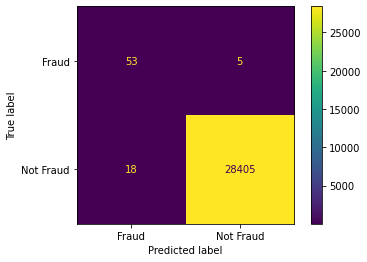

In [ ]:
fraudDetected,fraudNotDetected,notFraudDetected,notFraudNotDetected = [53, 5, 28405, 18]
oTest2 = sum([53, 5, 28405, 18])
cf_matrix = np.array([[53, 5], [18, 28405]])
categories = ['Fraud', 'Not Fraud']
cf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = categories)
cf_display.plot()
print("After", K ,"episodes:")
# print("fraudDetected =",fraudDetected)
# print("fraudNotDetected =",fraudNotDetected)
# print("notFraudDetected =",notFraudDetected)
# print("notFraudNotDetected =",notFraudNotDetected)
print("Accuracy =",(notFraudDetected+fraudDetected)*100/oTest2)
print("Fraud Detection Accuracy =",(fraudDetected)*100/(fraudDetected+fraudNotDetected))

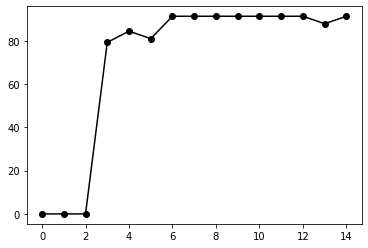

In [ ]:
statss = np.array(stats)
plt.plot(statss[:,0]*100/(statss[:,0]+statss[:,1]),'k-o')

In [ ]:
cf_matrix = np.array([   53,     5, 28405,    18])
cf_matrix

array([   53,     5, 28405,    18])

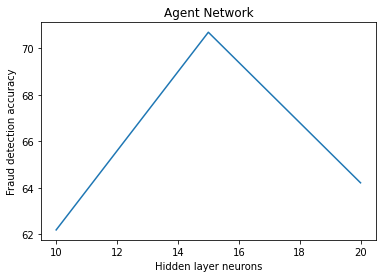

In [ ]:
x = np.array([10, 15, 20])
y = np.array([62.187, 70.689, 64.213])
plt.plot(x, y)
plt.xlabel("Hidden layer neurons")  # add X-axis label
plt.ylabel("Fraud detection accuracy")  # add Y-axis label
plt.title("Agent Network")  # add title
plt.show()